In [64]:
import cv2 
import numpy as np
import matplotlib.pylab as plt
import math 

def show(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")

# **Region Feature**

1. Squaredness
2. Circularity

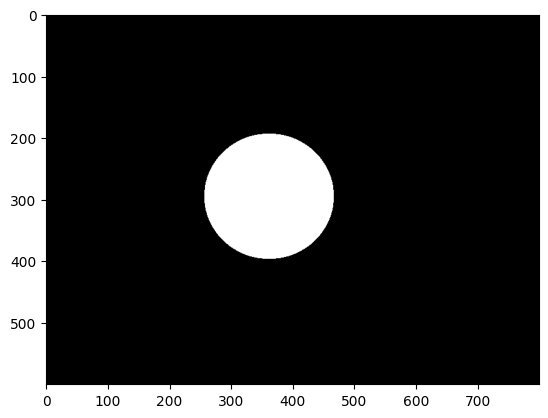

In [73]:
img = cv2.imread("images/RC.png", 0) 
_ , threshold = cv2.threshold(img,200, 255, cv2.THRESH_BINARY)
show(threshold)

In [74]:
output = cv2.connectedComponentsWithStats(threshold, 4, cv2.CV_32S)
num_obj , labels, starts, center = output

In [5]:
def threshold_range(img, T1, T2):
    _,th1 = cv2.threshold(img, T1,255, cv2.THRESH_BINARY_INV)
    _,th2 = cv2.threshold(img, T2,255, cv2.THRESH_BINARY_INV)
    
    th_range = cv2.bitwise_xor(th1,th2)
    
    return th_range

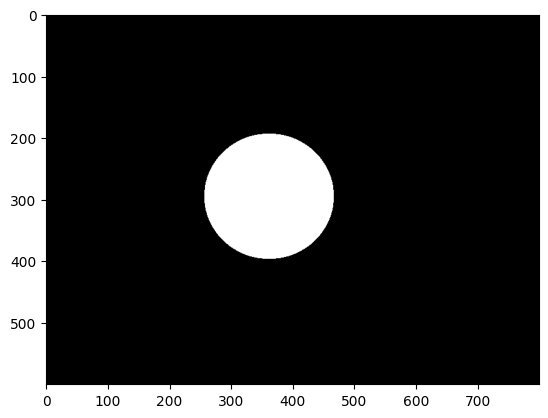

In [75]:
region  = threshold_range(labels.astype(np.uint8), 0,1)
show(region)

In [76]:
starts

array([[     0,      0,    800,    600, 446399],
       [   257,    194,    210,    203,  33601]], dtype=int32)

## Squaredness

In [78]:
features_region  =  starts[1, : ]
features_region

left  = features_region[0]
top  = features_region[1]
width  = features_region[2]
height  = features_region[3]
area  = features_region[4]


R = area / (max(width,height ) * max(width,height ))
R

0.7619274376417233

## Circularity

In [79]:
center_x = left + width /2
center_y = top + height /2
center_x, center_y

(362.0, 295.5)

In [80]:
countours, _ = cv2.findContours(region, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = countours[0].reshape(-1,2)

num_points = len(cnts)
list_distance =[ ]
for i in range(num_points):
    point_y = cnts[i][1]
    point_x = cnts[i][0]
    
    distance = math.sqrt((center_y - point_y)**2 + (center_x - point_x)**2)
    
    list_distance.append(distance)
    
max_distance = max(list_distance)
max_distance

S = math.pi * max_distance * max_distance
S
C  = area / S
C

0.9582735343856245

# **Gray Features**

1. Min, Max Gray Value
2. Variance and Standard Deviation 
3. Entropy

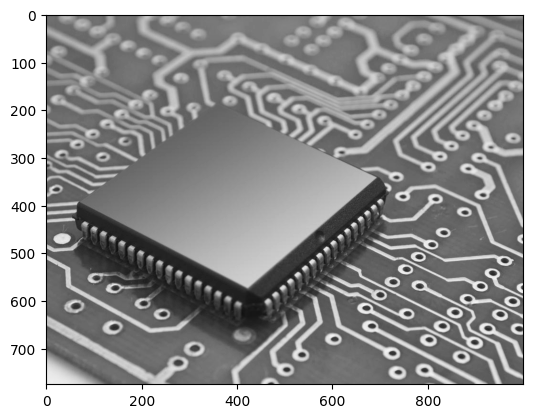

In [83]:
gray  = cv2.imread("images/chip.jpg",0)
show(gray)

min: 157
max: 200


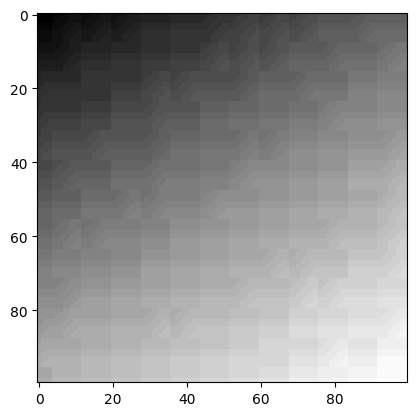

In [164]:
crop = gray[400:500, 380:480]
show(crop)
max  = np.max(crop)
min  = np.min(crop)
print(f'min: {min}')
print(f'max: {max}')

In [85]:
min_val, max_val, _,_ = cv2.minMaxLoc(crop)
min_val, max_val, _,_

(109.0, 128.0, (49, 47), (49, 47))

## Min, Max gray value

## Variance and Standard Deviation

$$mean = \frac {\Sigma (X_i)}{N} $$

$$ variance^2 = \frac{\Sigma(X_i - mean)^2}{N} $$

$$ standard\space deviation = \sqrt {variance ^2}$$

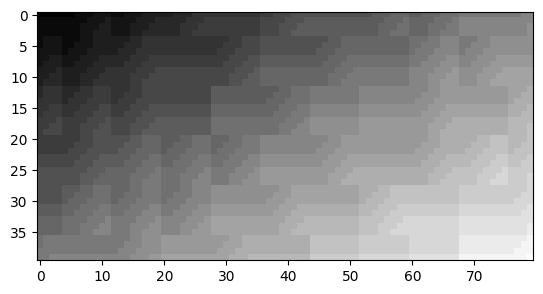

In [162]:
crop = gray[350:420, 20:500]
show(crop)

In [107]:
crop.shape
sum_gray_value = 0 
num_sample  =0
for y in range(crop.shape[0]):
    for x in range(crop.shape[1]):
        sum_gray_value += crop[y,x]
        num_sample+=1
        
mean = sum_gray_value / num_sample
mean

155.7280303030303

In [108]:
sum_ = 0
num_sample  = 0
for y in range(crop.shape[0]):
    for x in range(crop.shape[1]):
        X_i = crop[y,x]
        sum_ += (X_i - mean)**2
        num_sample+=1
  
  
variance  =   sum_ /     num_sample
variance   

std = math.sqrt(variance)
std

print(variance,std)

139.0619415748277 11.792452737867034


## Entropy
*$$Entropy = - \Sigma_{i=0}^{255} rel[i]*log_{e}(rel[i]) $$*

* rel : histogram
* log_e()

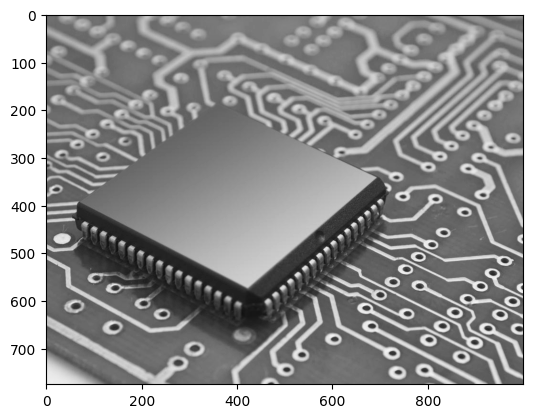

In [114]:
gray  = cv2.imread("images/chip.jpg",0)
show(gray)

In [135]:
hist = cv2.calcHist([gray],[0],  None ,[256],[0,256])
print(gray.shape[0] * gray.shape[1])

hist[1][0]

775000


1.0

In [140]:
math.e

2.718281828459045

In [153]:
def calc_entropy(hist):
    entropy = 0.0
    hist_copy = (hist / np.sum(hist))
    for i in range(256):
        
        num_pixel  = hist_copy[i][0]
        if num_pixel == 0:
            log = 0
        else:
            log = math.log(num_pixel, math.e)
        
        entropy += -num_pixel * log  
        
    return  entropy

In [155]:
entropy = calc_entropy(hist)
entropy

5.044912939608532

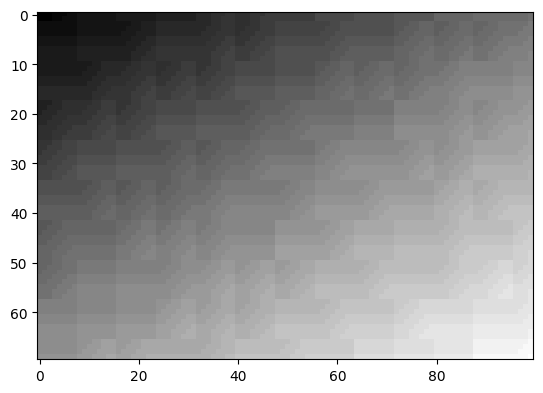

In [169]:
crop = gray[350:420, 400:500] 
show(crop)

In [171]:
hist = cv2.calcHist([crop],[0],  None ,[256],[0,256])
entropy = calc_entropy(hist)
entropy

3.436953718715129

# Find The Edge Point 

## check one point

In [179]:
def check_one_point_on_edge(threshold,edge_space,y,x):
    
    """
    
    """
    IS_EDGE = False
    if  threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255 \
        and threshold[y,x+1  ]==255 \
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]==255 \
      and threshold[y-1,x+1]==255 \
      and threshold[y,x+1  ]==255 \
      and threshold[y+1,x+1]==255\
      and threshold[y+1,x  ]==255\
      and threshold[y+1,x-1]==255\
      and threshold[y,x-1  ]!=255\
      and threshold[y-1,x-1]==255 :
      edge_space[y,x] =255

    if threshold[y-1,x]==255 \
      and threshold[y-1,x+1]==255  \
      and threshold[y,x+1  ]==255  \
      and threshold[y+1,x+1]==255 \
      and threshold[y+1,x  ]==255 \
      and threshold[y+1,x-1]!=255 \
      and threshold[y,x-1  ]==255 \
      and threshold[y-1,x-1]==255 :
      edge_space[y,x] =255

    if threshold[y-1,x]==255 \
      and threshold[y-1,x+1]==255\
      and threshold[y,x+1  ]==255\
      and threshold[y+1,x+1]==255\
      and threshold[y+1,x  ]!=255\
      and threshold[y+1,x-1]==255\
      and threshold[y,x-1  ]==255\
      and threshold[y-1,x-1]==255 :
      edge_space[y,x] =255
    if threshold[y-1,x]==255 \
      and threshold[y-1,x+1]==255\
      and threshold[y,x+1  ]==255\
      and threshold[y+1,x+1]!=255\
      and threshold[y+1,x  ]==255\
      and threshold[y+1,x-1]==255\
      and threshold[y,x-1  ]==255\
      and threshold[y-1,x-1]==255 :
      edge_space[y,x] =255
    if threshold[y-1,x]==255 \
      and threshold[y-1,x+1]==255\
      and threshold[y,x+1  ]!=255\
      and threshold[y+1,x+1]==255\
      and threshold[y+1,x  ]==255\
      and threshold[y+1,x-1]==255\
      and threshold[y,x-1  ]==255\
      and threshold[y-1,x-1]==255 :
      edge_space[y,x] =255
    if threshold[y-1,x]==255 \
      and threshold[y-1,x+1]!=255\
      and threshold[y,x+1  ]==255\
      and threshold[y+1,x+1]==255\
      and threshold[y+1,x  ]==255\
      and threshold[y+1,x-1]==255\
      and threshold[y,x-1  ]==255\
      and threshold[y-1,x-1]==255 :
      edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
      and threshold[y-1,x+1]==255\
      and threshold[y,x+1  ]==255\
      and threshold[y+1,x+1]==255\
      and threshold[y+1,x  ]==255\
      and threshold[y+1,x-1]==255\
      and threshold[y,x-1  ]==255\
      and threshold[y-1,x-1]==255 :
      edge_space[y,x] =255
    return IS_EDGE
    

## Check two point

In [182]:
def check_two_point_on_edge (threshold,edge_space,y,x):
    IS_EDGE = False
    if  threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255 \
        and threshold[y,x+1  ]==255 \
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255 \
        and threshold[y,x+1  ]==255 \
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255

    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255  \
        and threshold[y,x+1  ]==255  \
        and threshold[y+1,x+1]==255 \
        and threshold[y+1,x  ]!=255 \
        and threshold[y+1,x-1]!=255 \
        and threshold[y,x-1  ]==255 \
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255

    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255\
        and threshold[y,x+1  ]==255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
      and threshold[y-1,x-1]==255 :
      edge_space[y,x] =255
    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255
    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]==255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]==255\
        and threshold[y,x+1  ]==255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    return IS_EDGE

## Check three point

In [184]:
def check_three_point_on_edge (threshold,edge_space,y,x):
    IS_EDGE = False
    if  threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255 \
        and threshold[y,x+1  ]==255 \
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255 \
        and threshold[y,x+1  ]==255 \
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255

    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255  \
        and threshold[y,x+1  ]==255  \
        and threshold[y+1,x+1]!=255 \
        and threshold[y+1,x  ]!=255 \
        and threshold[y+1,x-1]!=255 \
        and threshold[y,x-1  ]==255 \
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255

    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255\
            and threshold[y,x+1  ]!=255\
            and threshold[y+1,x+1]!=255\
            and threshold[y+1,x  ]!=255\
            and threshold[y+1,x-1]==255\
            and threshold[y,x-1  ]==255\
            and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255
    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]==255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]==255\
        and threshold[y,x+1  ]==255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    return IS_EDGE

## Check four Point

In [185]:
def check_four_point_on_edge (threshold,edge_space,y,x):
    IS_EDGE = False
    if  threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255 \
        and threshold[y,x+1  ]==255 \
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
            and threshold[y-1,x-1]!=255 :
            edge_space[y,x] =255
    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255 \
        and threshold[y,x+1  ]==255 \
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255

    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255  \
        and threshold[y,x+1  ]!=255  \
        and threshold[y+1,x+1]!=255 \
        and threshold[y+1,x  ]!=255 \
        and threshold[y+1,x-1]!=255 \
        and threshold[y,x-1  ]==255 \
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255

    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]==255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]==255\
        and threshold[y,x+1  ]==255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    return IS_EDGE

## Check five point

In [186]:
def check_five_point_on_edge (threshold,edge_space,y,x):
    IS_EDGE = False
    if  threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255 \
        and threshold[y,x+1  ]==255 \
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255 \
        and threshold[y,x+1  ]!=255 \
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255

    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]!=255  \
        and threshold[y,x+1  ]!=255  \
        and threshold[y+1,x+1]!=255 \
        and threshold[y+1,x  ]!=255 \
        and threshold[y+1,x-1]!=255 \
        and threshold[y,x-1  ]==255 \
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255

    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]==255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]==255\
        and threshold[y,x+1  ]==255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    return IS_EDGE

## Check Six Point

In [189]:
def check_six_point_on_edge (threshold,edge_space,y,x):
    IS_EDGE = False
    if  threshold[y-1,x]==255 \
        and threshold[y-1,x+1]==255 \
        and threshold[y,x+1  ]!=255 \
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]==255 \
        and threshold[y-1,x+1]!=255 \
        and threshold[y,x+1  ]!=255 \
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255

    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255  \
        and threshold[y,x+1  ]!=255  \
        and threshold[y+1,x+1]!=255 \
        and threshold[y+1,x  ]!=255 \
        and threshold[y+1,x-1]!=255 \
        and threshold[y,x-1  ]==255 \
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255

    if threshold[y-1,x]!=255 \
      and threshold[y-1,x+1]!=255\
      and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]==255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]==255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]==255\
        and threshold[y,x+1  ]==255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    return IS_EDGE

## Check seven point

In [196]:
def check_seven_point_on_edge (threshold,edge_space,y,x):
    IS_EDGE = False
    if  threshold[y-1,x]==255 \
        and threshold[y-1,x+1]!=255 \
        and threshold[y,x+1  ]!=255 \
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255 \
        and threshold[y,x+1  ]!=255 \
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]==255 :
        edge_space[y,x] =255

    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255  \
        and threshold[y,x+1  ]!=255  \
        and threshold[y+1,x+1]!=255 \
        and threshold[y+1,x  ]!=255 \
        and threshold[y+1,x-1]!=255 \
        and threshold[y,x-1  ]==255 \
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255

    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]==255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]==255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]!=255\
        and threshold[y+1,x+1]==255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
        edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
        and threshold[y-1,x+1]!=255\
        and threshold[y,x+1  ]==255\
        and threshold[y+1,x+1]!=255\
        and threshold[y+1,x  ]!=255\
        and threshold[y+1,x-1]!=255\
        and threshold[y,x-1  ]!=255\
        and threshold[y-1,x-1]!=255 :
      edge_space[y,x] =255
    if threshold[y-1,x]!=255 \
      and threshold[y-1,x+1]==255\
      and threshold[y,x+1  ]!=255\
      and threshold[y+1,x+1]!=255\
      and threshold[y+1,x  ]!=255\
      and threshold[y+1,x-1]!=255\
      and threshold[y,x-1  ]!=255\
      and threshold[y-1,x-1]!=255 :
      edge_space[y,x] =255
    return IS_EDGE

## Find Edge

In [198]:
edge_space = np.zeros((threshold.shape[0], threshold.shape[1]),dtype = np.uint8)

for y in range(threshold.shape[0]):
    for x in range(threshold.shape[1]):
        
        
        if threshold[y,x] == 255: 
            # Check it nhat 1 diem xung quanh diem dang xet khong phai mau trang thi diem dang xet moi thuoc bien 
            check_one_point_on_edge(threshold, edge_space, y,x)
            
            # Check it nhat 2 diem xung quanh diem dang xet khong phai mau trang thi diem dang xet moi thuoc bien 
            check_two_point_on_edge(threshold, edge_space, y,x)
            
            # Check it nhat 3 diem xung quanh diem dang xet khong phai mau trang thi diem dang xet moi thuoc bien 
            check_three_point_on_edge(threshold, edge_space, y,x)
            
            # Check it nhat 4 diem xung quanh diem dang xet khong phai mau trang thi diem dang xet moi thuoc bien 
            check_four_point_on_edge(threshold, edge_space, y,x)
            
            # Check it nhat 5 diem xung quanh diem dang xet khong phai mau trang thi diem dang xet moi thuoc bien 
            check_five_point_on_edge(threshold, edge_space, y,x)
            
            # Check it nhat 6 diem xung quanh diem dang xet khong phai mau trang thi diem dang xet moi thuoc bien 
            check_six_point_on_edge(threshold, edge_space, y,x)
            
            # Check it nhat 7 diem xung quanh diem dang xet khong phai mau trang thi diem dang xet moi thuoc bien 
            check_seven_point_on_edge(threshold, edge_space, y,x)
            

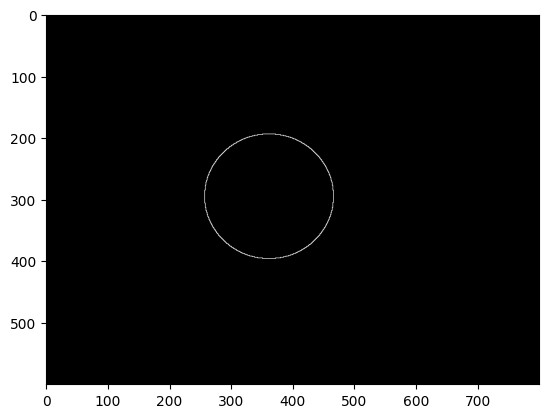

In [199]:
show(edge_space)

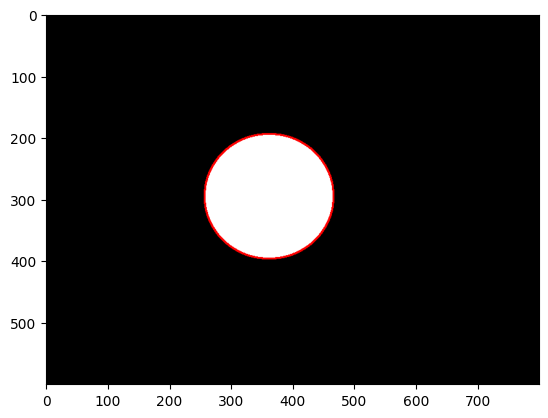

In [217]:

img = cv2.imread("images/RC.png") 
countours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img,countours,-1,(255,0,0),2)
show(img)

# Centerx , Centery (Moment of Contour)

In [203]:
N = 0
N_x = 0
N_y = 0

for y in range(edge_space.shape[0]):
    for x in range(edge_space.shape[1]):
        if edge_space[y,x] ==255:
            N_x +=x
            N_y +=y
            N +=1
            
center_x = int(N_x/N)
center_y = int(N_y/N)
center_x,center_y

(361, 295)

In [223]:
moments = cv2.moments(threshold)
a = moments["m10"]
b = moments["m01"]
N = moments["m00"]

C_y = int(a / N)
C_x = int(b / N)
C_y, C_x

(361, 295)

## Draw center

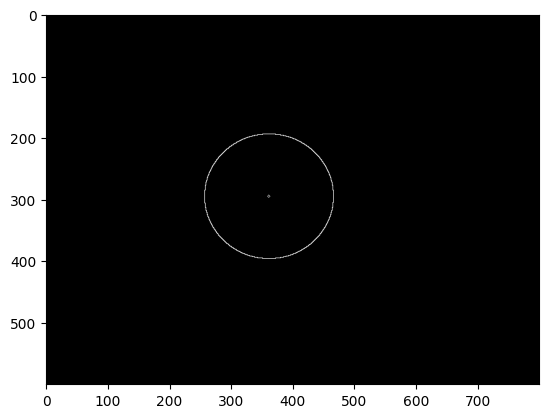

In [213]:
edge_space_copy = edge_space.copy()

edge_space_copy = cv2.circle(edge_space_copy, (center_x,center_y), 2,(255),1)
show(edge_space_copy)